

# Final Project

For this project, We examine the problem of predicting wine quality using the red wine subset of the Wine Quality dataset from the UCI Machine Learning Repository. Alcohol, sulphates, volatile acidity, and sulfur dioxide levels appeared as the strongest predictors. Several papers have used this same red wine dataset for classification or quality prediction. Their results consistently show moderate predictability. Here are the results:

Project created by Michael Wojcik (991511320)

  


Dataset shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


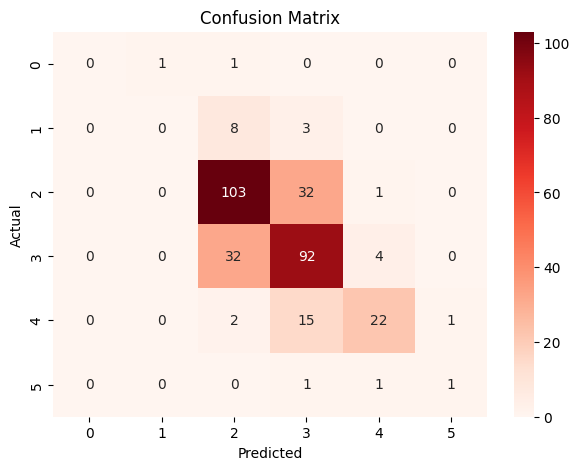

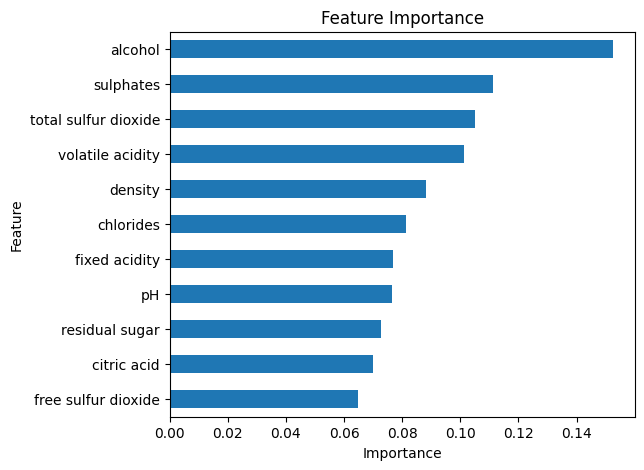


Feature importances (descending):
alcohol                 0.152368
sulphates               0.111287
total sulfur dioxide    0.104909
volatile acidity        0.101199
density                 0.088127
chlorides               0.081436
fixed acidity           0.076692
pH                      0.076642
residual sugar          0.072566
citric acid             0.070106
free sulfur dioxide     0.064669
dtype: float64


In [3]:
# Initlization Setup and imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Download the repositories here:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

# This loads the datasets:
df = pd.read_csv("winequality-red.csv", sep=";")

print("Dataset shape:", df.shape)
print(df.head())

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=None
)
model.fit(X_train, y_train)

# Create the predictions here:
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc:.3f}\n")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 5))
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\nFeature importances (descending):")
print(importances.sort_values(ascending=False))